# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read data from csv

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
from pandas import read_csv
credit_df = pd.read_csv('credit_data.txt',  delimiter='\t', low_memory=False, parse_dates=["issue_d"])

In [7]:
credit_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

In [10]:
credit_df.describe(include = [np.number]) #numerical value describe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

# Preprocessing

## NULL values

#### Let's see how many NULL values we have in our data!

In [11]:
credit_df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [12]:
#filling value to 0 for these two columns
for col in ('revol_util', 'collections_12_mths_ex_med'):
    credit_df[col] = credit_df[col].fillna(0)

#### There are columns where most of values are NULLs. So remove those columns where more than 1% of the rows for that column contain a null value.

In [13]:
cleaned_data = credit_df[[label for label in credit_df if credit_df[label].isnull().sum() <= 0.01 * credit_df.shape[0]]]

##### Let's see how it looks like now!

In [14]:
cleaned_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,2011-12-01,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,2011-12-01,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,2011-12-01,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,2011-12-01,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0


In [15]:
cleaned_data.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
title                         33
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_

In [16]:
cleaned_data.shape[0] / credit_df.shape[0]

1.0

# Remove useless columns

- As we can see, two first columns contain randomly generated numbers, which are some identifiers. 
- Column"zip_code" is redundant with the "addr_state" and only 3 digits of 5 digit code zip are visible.
- Column sub_grade is reduntant to columns "grade" and "int_rate".
- Column "title"  requires a lot of processing to become useful.

In [17]:
cleaned_data = cleaned_data.drop(["id", "member_id", "sub_grade", "zip_code", "title"], axis=1)

### Columns with only one value

In [18]:
for label in list(cleaned_data):
    if len(cleaned_data[label].unique()) < 5:
        print(cleaned_data[label].value_counts())
        print("\n")

 36 months    600221
 60 months    255748
Name: term, dtype: int64


Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64


n    855964
y         5
Name: pymnt_plan, dtype: int64


f    442555
w    413414
Name: initial_list_status, dtype: int64


1.0    855969
Name: policy_code, dtype: int64


INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


0    809502
1     46467
Name: default_ind, dtype: int64




- We can see that feature "pymnt_plan" has only two possible values: "n" and "y", but with only 10 occurrences of "y" (less than 1%), so definitely it is insignificant. 
- The same with "application_type" feature: value "joint" has 0,05% frequency. 
- On the other hand, feature "policy_code" has only one possible value, so it's absolutely useless for us.

In [19]:
cleaned_data = cleaned_data.drop(["pymnt_plan", "policy_code", "application_type"], axis=1)

### Categorical features

In [20]:
cleaned_data.select_dtypes(include=["object"]).head()

,term,grade,home_ownership,verification_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d
0,36 months,B,RENT,Verified,credit_card,AZ,Jan-1985,f,Jan-2016
1,60 months,C,RENT,Source Verified,car,GA,Apr-1999,f,Sep-2013
2,36 months,C,RENT,Not Verified,small_business,IL,Nov-2001,f,Jan-2016
3,36 months,C,RENT,Source Verified,other,CA,Feb-1996,f,Jan-2015
4,60 months,B,RENT,Source Verified,other,OR,Jan-1996,f,Jan-2016


- "initial_list_status" has only 2 possible values, so we can map it to 1/0 feature.
- "term" is a numerical feature, but we have to delete "months" from this.
- "last_pymnt_amnt" is definitely numerical, so the parsing is enough.

In [21]:
cleaned_data["initial_list_status"] = cleaned_data["initial_list_status"].map({"f": 1, "w": 0})
cleaned_data["last_pymnt_amnt"] = cleaned_data["last_pymnt_amnt"].astype("float")
cleaned_data['term'].replace(regex=True,inplace=True,to_replace=r'months',value=r'')

## Datetime features

In [22]:
cleaned_data.select_dtypes(include=["datetime"]).head()

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01


### Remvoing highly correlated or un-correlated data

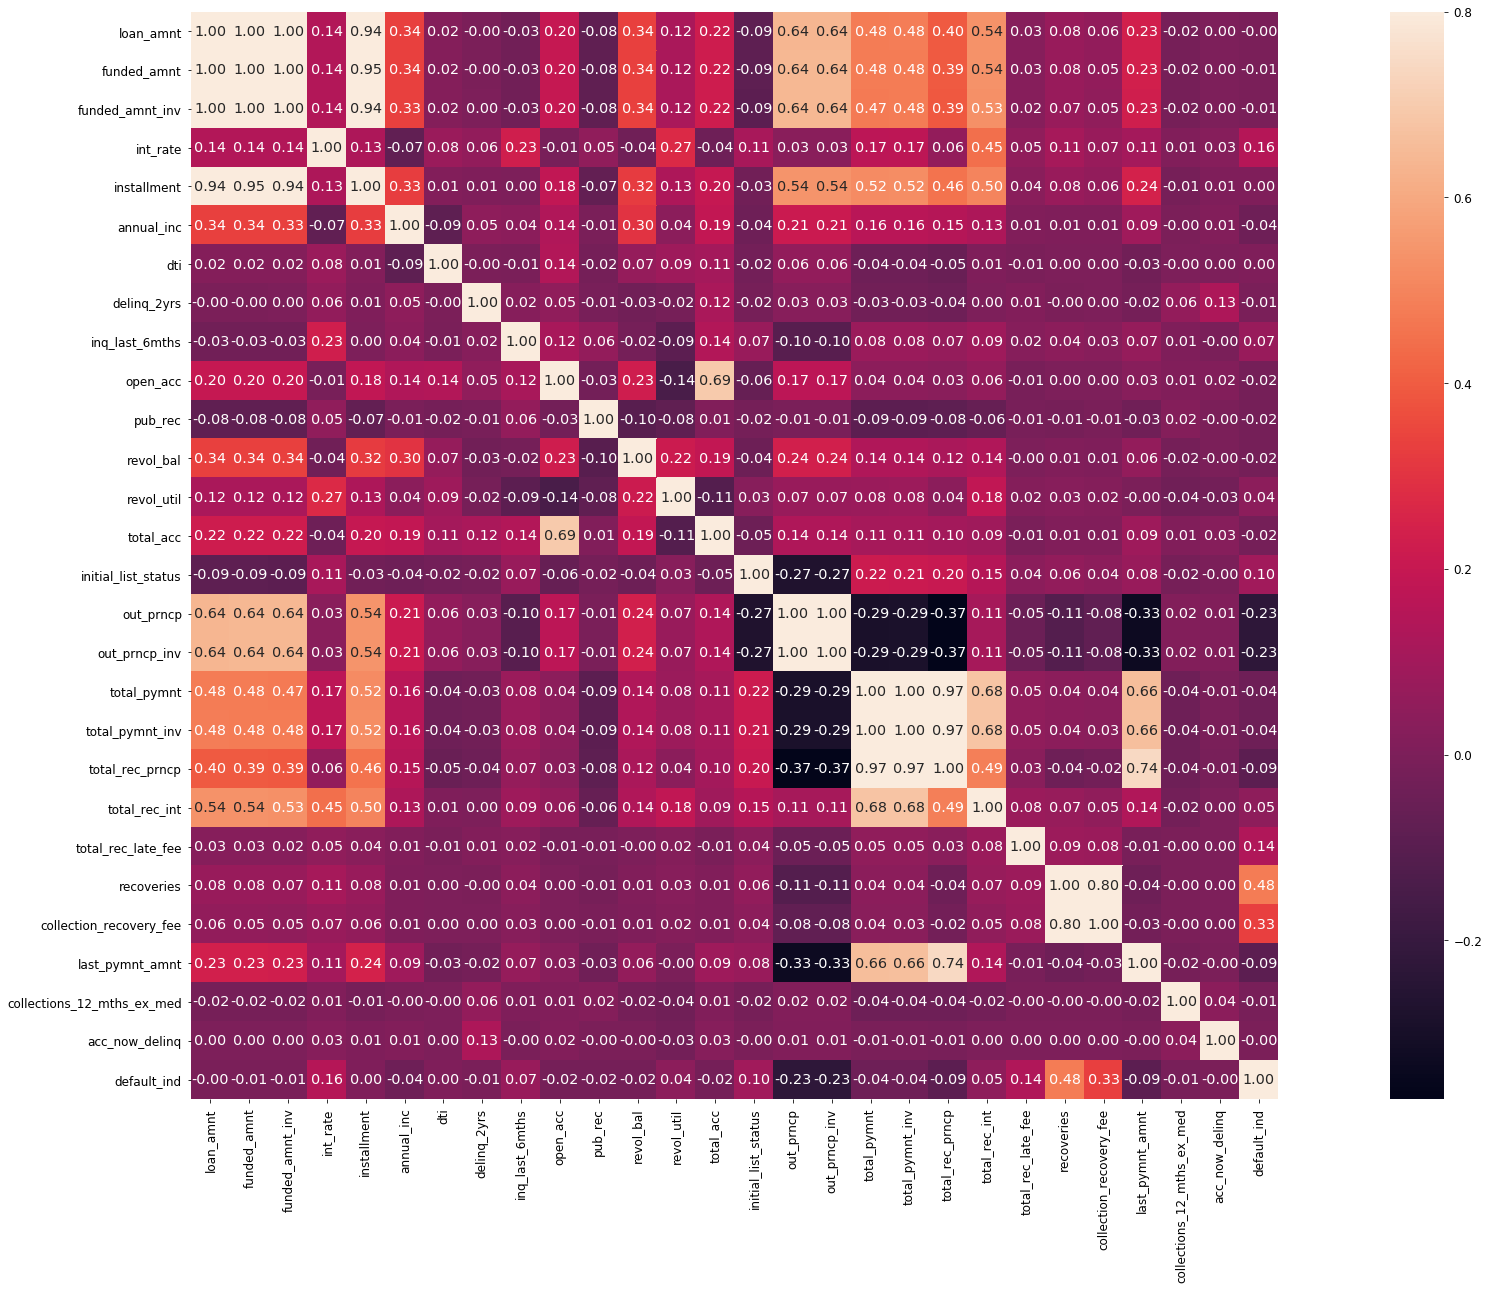

In [23]:
plt.figure(figsize=(40,20))
sns.set_context("paper", font_scale=1.5)
sns.heatmap(cleaned_data.corr(), vmax=.8, square=True, annot=True, fmt='.2f')

In [25]:
cleaned_data = cleaned_data.drop(["funded_amnt", "funded_amnt_inv", "out_prncp_inv",
                                 "total_pymnt_inv", "total_rec_prncp", "collections_12_mths_ex_med"], axis=1)

#### Removing datetime features as it is not required while model building

In [26]:
cleaned_data = cleaned_data.drop(["earliest_cr_line", "last_credit_pull_d"], axis=1)

#### Found some columns are not helping while building model building, so removing them.

In [27]:
cleaned_data = cleaned_data.drop(['total_pymnt','total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                 'last_pymnt_amnt', 'acc_now_delinq', 'out_prncp', 'initial_list_status'], axis=1)

In [28]:
cleaned_data.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
default_ind            0
dtype: int64

### Dividing data into Train and Test

In [29]:
#train data creation using issue_d ( June 2007 - May 2015 )
train_data=cleaned_data[cleaned_data['issue_d']<='May-2015']
train_data.shape

(598978, 20)

In [30]:
#Test data creation using issue_d ( June 2015 - Dec 2015 )
test_data=cleaned_data[cleaned_data['issue_d']>'May-2015']
test_data.shape

(256991, 20)

### Formatting of the Categorical columns

In [31]:
colname=['term','grade','home_ownership','verification_status','purpose','addr_state']
colname

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state']

In [32]:
from sklearn import preprocessing

le={}

for label in colname:
    le[label]=preprocessing.LabelEncoder()
    
for label in colname:
    train_data[label]=le[label].fit_transform(train_data.__getattr__(label))

train_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,default_ind
0,5000.0,0,10.65,162.87,1,5,24000.0,2,2011-12-01,1,3,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0
1,2500.0,1,15.27,59.83,2,5,30000.0,1,2011-12-01,0,10,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,1
2,2400.0,0,15.96,84.33,2,5,12252.0,0,2011-12-01,11,14,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0
3,10000.0,0,13.49,339.31,2,5,49200.0,1,2011-12-01,9,4,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0
4,3000.0,1,12.69,67.79,1,5,80000.0,1,2011-12-01,9,36,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0


In [33]:
from sklearn import preprocessing

le={}

for label in colname:
    le[label]=preprocessing.LabelEncoder()
    
for label in colname:
    test_data[label]=le[label].fit_transform(test_data.__getattr__(label))

test_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,default_ind
452272,25000.0,0,5.32,752.87,0,1,150000.0,0,2015-12-01,1,44,9.54,0.0,0.0,7.0,0.0,19339.0,42.5,18.0,0
452273,18000.0,1,19.48,471.70,4,3,150000.0,0,2015-12-01,2,4,9.39,0.0,1.0,18.0,1.0,14052.0,40.7,27.0,0
452274,7000.0,0,7.49,217.72,0,1,59000.0,0,2015-12-01,1,18,13.06,1.0,1.0,10.0,0.0,10467.0,24.2,34.0,0
452275,20000.0,0,17.97,722.75,3,1,180000.0,0,2015-12-01,2,41,25.10,0.0,0.0,13.0,0.0,59126.0,92.1,30.0,0
452276,15000.0,0,6.99,463.09,0,1,93000.0,0,2015-12-01,1,17,14.86,0.0,1.0,8.0,0.0,14914.0,43.2,17.0,0


### Removing issue_d column as it is not required while column building

In [34]:
train_data = train_data.drop(["issue_d"], axis=1)
test_data = test_data.drop(["issue_d"], axis=1)

### Selecting dependent and independent variables for train and test data

In [35]:
x_train=train_data.values[:, 1:-1]
y_train=train_data.values[:,-1]

x_test=test_data.values[:, 1:-1]
y_test=test_data.values[:,-1]

### Transformation of final data

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
print(x_train)

scaler.fit(x_test)
x_test=scaler.transform(x_test)
print(x_test)

[[-0.63401425 -0.65681512 -1.11856912 ... -0.13659183  1.17486081
  -1.38480861]
 [ 1.57725161  0.40016163 -1.5427897  ... -0.70795561 -1.95463302
  -1.81151453]
 [-0.63401425  0.55802179 -1.44192204 ... -0.64733688  1.7982324
  -1.29946742]
 ...
 [ 1.57725161  0.56488528 -0.48783744 ... -0.26160303  0.23137949
  -0.27537321]
 [ 1.57725161  1.48001666 -0.48046792 ... -0.39425726 -1.06169535
  -0.44605558]
 [-0.63401425 -0.3502461   0.94543033 ...  0.8005384   1.01059397
  -1.29946742]]
[[-0.69688714 -1.66616687  1.27323118 ...  0.05968494 -0.44205225
  -0.61144882]
 [ 1.43495258  1.65375898  0.12847542 ... -0.15224423 -0.51719481
   0.13539338]
 [-0.69688714 -1.15739292 -0.90557894 ... -0.29594881 -1.20600154
   0.71627064]
 ...
 [-0.69688714  0.96679693  1.81415748 ...  0.78542311  1.24865519
   0.30135831]
 [-0.69688714 -1.34730393  1.33597146 ...  0.90267162  1.63271713
  -0.86039621]
 [ 1.43495258 -0.99561687  0.253671   ... -0.17132467 -1.14755734
   0.13539338]]


# Model Building

# Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

#create a model
classifier=(LogisticRegression(random_state=0))

#Training the model - Fitting training data into model
classifier.fit(x_train, y_train)

#Test the model
y_pred=classifier.predict(x_test)
print(list(zip(y_test, y_pred)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

[[256549    131]
 [   311      0]]
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    256680
        1.0       0.00      0.00      0.00       311

avg / total       1.00      1.00      1.00    256991

Accuracy of the model: 0.9982800954119015


# Random Forest

In [155]:
#predicting using the Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=(RandomForestClassifier(100))
#fit the model on the data and predict the values
model_RandomForest=model_RandomForest.fit(x_train, y_train)

y_pred=model_RandomForest.predict(x_test)

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

[[256680      0]
 [   311      0]]
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    256680
        1.0       0.00      0.00      0.00       311

avg / total       1.00      1.00      1.00    256991

Accuracy of the model: 0.9987898408893696


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagging using ExtraTreesClassifier

In [157]:
#predicting using the Bagging Classifier
from sklearn.ensemble import ExtraTreesClassifier

model=(ExtraTreesClassifier(21))
#fit the model on the data and predict the values
model=model.fit(x_train, y_train)

y_pred=model.predict(x_test)

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

[[256519    161]
 [   311      0]]
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    256680
        1.0       0.00      0.00      0.00       311

avg / total       1.00      1.00      1.00    256991

Accuracy of the model: 0.9981633598063745


# Running Decision Tree Model

In [163]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=True, random_state=None,
                      splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best')

In [164]:
#predicting using Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(x_train, y_train)

#fit the model in the data and predict the values
y_pred=model_DecisionTree.predict(x_test)
print(y_pred)
print(list(zip(y_test, y_pred)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

[[228358  28322]
 [   263     48]]
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.89      0.94    256680
        1.0       0.00      0.15      0.00       311

avg / total       1.00      0.89      0.94    256991

Accuracy of the model: 0.8887704238669837


# Boosting

In [166]:
#predicting using the AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100))
#fit the model on the data and predict the values
model_AdaBoost=model_AdaBoost.fit(x_train, y_train)

y_pred=model_AdaBoost.predict(x_test)

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

[[228124  28556]
 [   261     50]]
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.89      0.94    256680
        1.0       0.00      0.16      0.00       311

avg / total       1.00      0.89      0.94    256991

Accuracy of the model: 0.8878676685175746


# SVM

In [ ]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf', C=1.0, gamma=0.1)
#from sklearn.linear_model import LogisticRegression
#svc_model=logisticRegression()
svc_model.fit(x_train, y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

In [ ]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf', C=1.0, gamma=0.1)
#from sklearn.linear_model import LogisticRegression
#svc_model=logisticRegression()
svc_model.fit(x_train, y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))